In [6]:
import numpy as np
sig=0.4
s0=75000
mean=0.0175
w=np.random.normal(0,1,1)
s1=s0*np.exp(sig*(1/np.sqrt(252))*w+mean/252-(sig**2)/2)
s1

array([71705.59984027])

### 정답

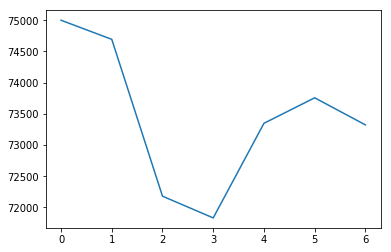

In [22]:
import matplotlib.pyplot as plt
sigma=0.4/np.sqrt(252)
s0=75000
r=0.0175/252
w=np.random.normal(0,1,1)
s1=s0*np.exp(sigma*np.random.normal(0,1,1)+r-(sigma**2)/2)
s2=s1*np.exp(sigma*np.random.normal(0,1,1)+r-(sigma**2)/2)
s3=s2*np.exp(sigma*np.random.normal(0,1,1)+r-(sigma**2)/2)
s4=s3*np.exp(sigma*np.random.normal(0,1,1)+r-(sigma**2)/2)
s5=s4*np.exp(sigma*np.random.normal(0,1,1)+r-(sigma**2)/2)
s6=s5*np.exp(sigma*np.random.normal(0,1,1)+r-(sigma**2)/2)
S=[s0,s1,s2,s3,s4,s5,s6]
plt.plot(S)

103341.80487698688


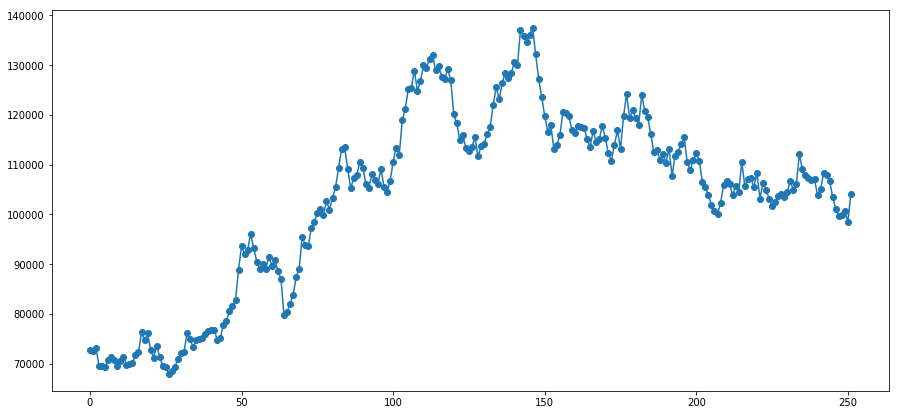

In [34]:
s0=75000
S=[]
for i in range(252):
    S.append(s0*np.exp(sigma * np.random.normal(0,1,1)+r-(sigma**2)/2))
    s0=S[-1]
print(np.mean(S))
plt.figure(figsize=(15,7))
plt.plot(S,'-o')
plt.show()

### Geometric Brownian Motion

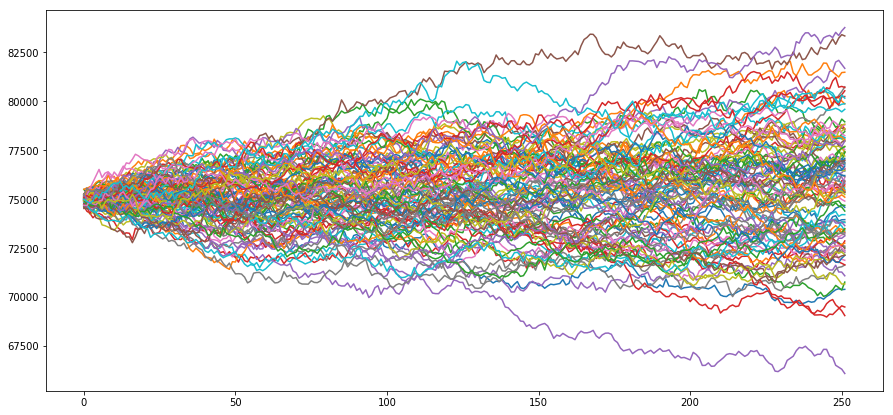

78809.09779645837


In [61]:
#GRM모형으로 1년치 가상주가 생성
s0=75000
r=0.0175/252
sigma=0.04/np.sqrt(252) #변동성은 40%
def GBM(s0):
    S=[]
    for i in range(252):
        w=np.random.normal(0,1,1)
        S.append(s0*np.exp(sigma*w+r-(sigma**2)/2))
        s0=S[-1]
        
    return S
plt.figure(figsize=(15,7))
M=[]
for i in range(100):
    S=GBM(s0)
    plt.plot(S)
    M=np.mean(S)
plt.plot(M,color='black', linewidth=10.0)
plt.show()
print(M)

C:\Users\user\anac\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\user\anac\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
C:\Users\user\anac\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in add
C:\Users\user\anac\lib\site-packages\matplotlib\transforms.py:2950: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\user\anac\lib\site-packages\matplotlib\axes\_base.py:2504: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin


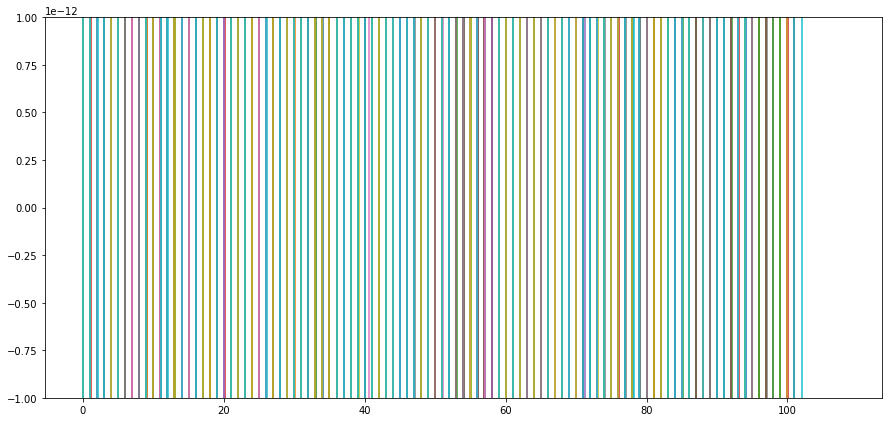

In [66]:
S0=75000
r=0.0175/252
sigma=0.4/np.sqrt(252)
def GBM(S0):
    S=[]
    k1=[100]
    k2=[100]
    for i in range(252):
        w=np.random.normal(0,1,1)
        S1=S0*np.exp(sigma*w+r-(sigma**2)/2)
        S.append(S1)
        
        #수익률
        rtn=(S1 -S0)
        k1.append(k1[-1]*(1+rtn))
        k2.append(k2[-1]*(1+rtn))
        S0=S1
    return k1,k2

plt.figure(figsize=(15,7))
for i in range(100):
    k1,k2=GBM(S0)
    plt.plot(np.add(k1,k2))
plt.show()


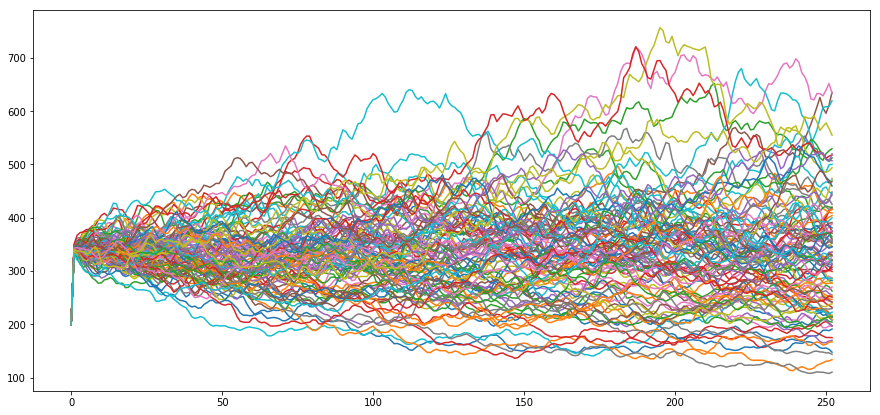

In [67]:
#k1과 k2
def GBM(s0):
    s=[]
    k1=[170]
    k2=[30]
    for i in range(252):
        w=np.random.normal(0,1,1)
        s1=s0*np.exp(sigma*w+(r-0.5*(sigma**2)))
        s.append(s1)
        
        rtn=(s1-s0)/s0
        k1.append(k1[-1]*(1+rtn))
        k2.append(k1[-1]*(1-rtn))
        s0=s1
    return k1,k2

r=0.00175 / 252
sigma=0.4 / np.sqrt(252)
s1=75000
GBM(s0)
plt.figure(figsize=(15,7))
for i in range(100):
    k1,k2=GBM(s0)
    plt.plot(np.add(k1,k2))